# Quick look at NEMO Baltic Sea forecast data

The Copernicus Marine Environment Monitoring Service provides a wealth of data on the world's oceans and seas, including the Baltic Sea. The Baltic Sea is a particularly interesting region for oceanographers, as it is a brackish inland sea that experiences a variety of environmental conditions.

One useful dataset for studying the Baltic Sea is the `BALTICSEA_ANALYSISFORECAST_PHY_003_00` dataset, which is available on the Copernicus Marine Environment Monitoring Service website. This dataset contains a variety of variables related to the physical properties of the Baltic Sea, including temperature, salinity, and currents. The data is available on a regular grid and is updated on a daily basis.

In [3]:
%matplotlib inline
import xarray as xr
from cmocean import cm as cmo  
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import gsw
from metpy.interpolate import cross_section
import glidertools as gt
import glob
import imageio
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


def gridlines(ax,lon_tick,lat_tick):
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      x_inline=False, y_inline=False,
                      linewidth=0.75, alpha=0.5, linestyle='--',color='w',
                      ylocs = mpl.ticker.MultipleLocator(base=lat_tick),xlocs = mpl.ticker.MultipleLocator(base=lon_tick))
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    gl.xpadding=10
    gl.ypadding=10

## Try with an hourly snapshot

In [4]:
ds = xr.open_dataset('/Users/xedhjo/Documents/Projects/OC4920/data/Baltic Sea/BAL-NEMO_PHY-2023042500.nc')
ds = ds.sel(lon=slice(7,15),lat=slice(54,60))

In [5]:
list(ds.keys())

['thetao',
 'so',
 'uo',
 'vo',
 'wo',
 'bottomT',
 'sob',
 'sla',
 'sithick',
 'siconc',
 'mlotst']

In [6]:
for key in list(ds.keys()):
    print(ds[key].attrs['long_name'])

potential temperature
salinity
Eastward current
Northward current
Upward current
Sea water potential temperature at sea floor (given for depth comprise between 0 and 500m)
Sea water salinity at sea floor
Sea level elevation
Sea ice thickness
Sea ice cover
Ocean mixed layer thickness defined by density (as in de Boyer Montegut, 2004)


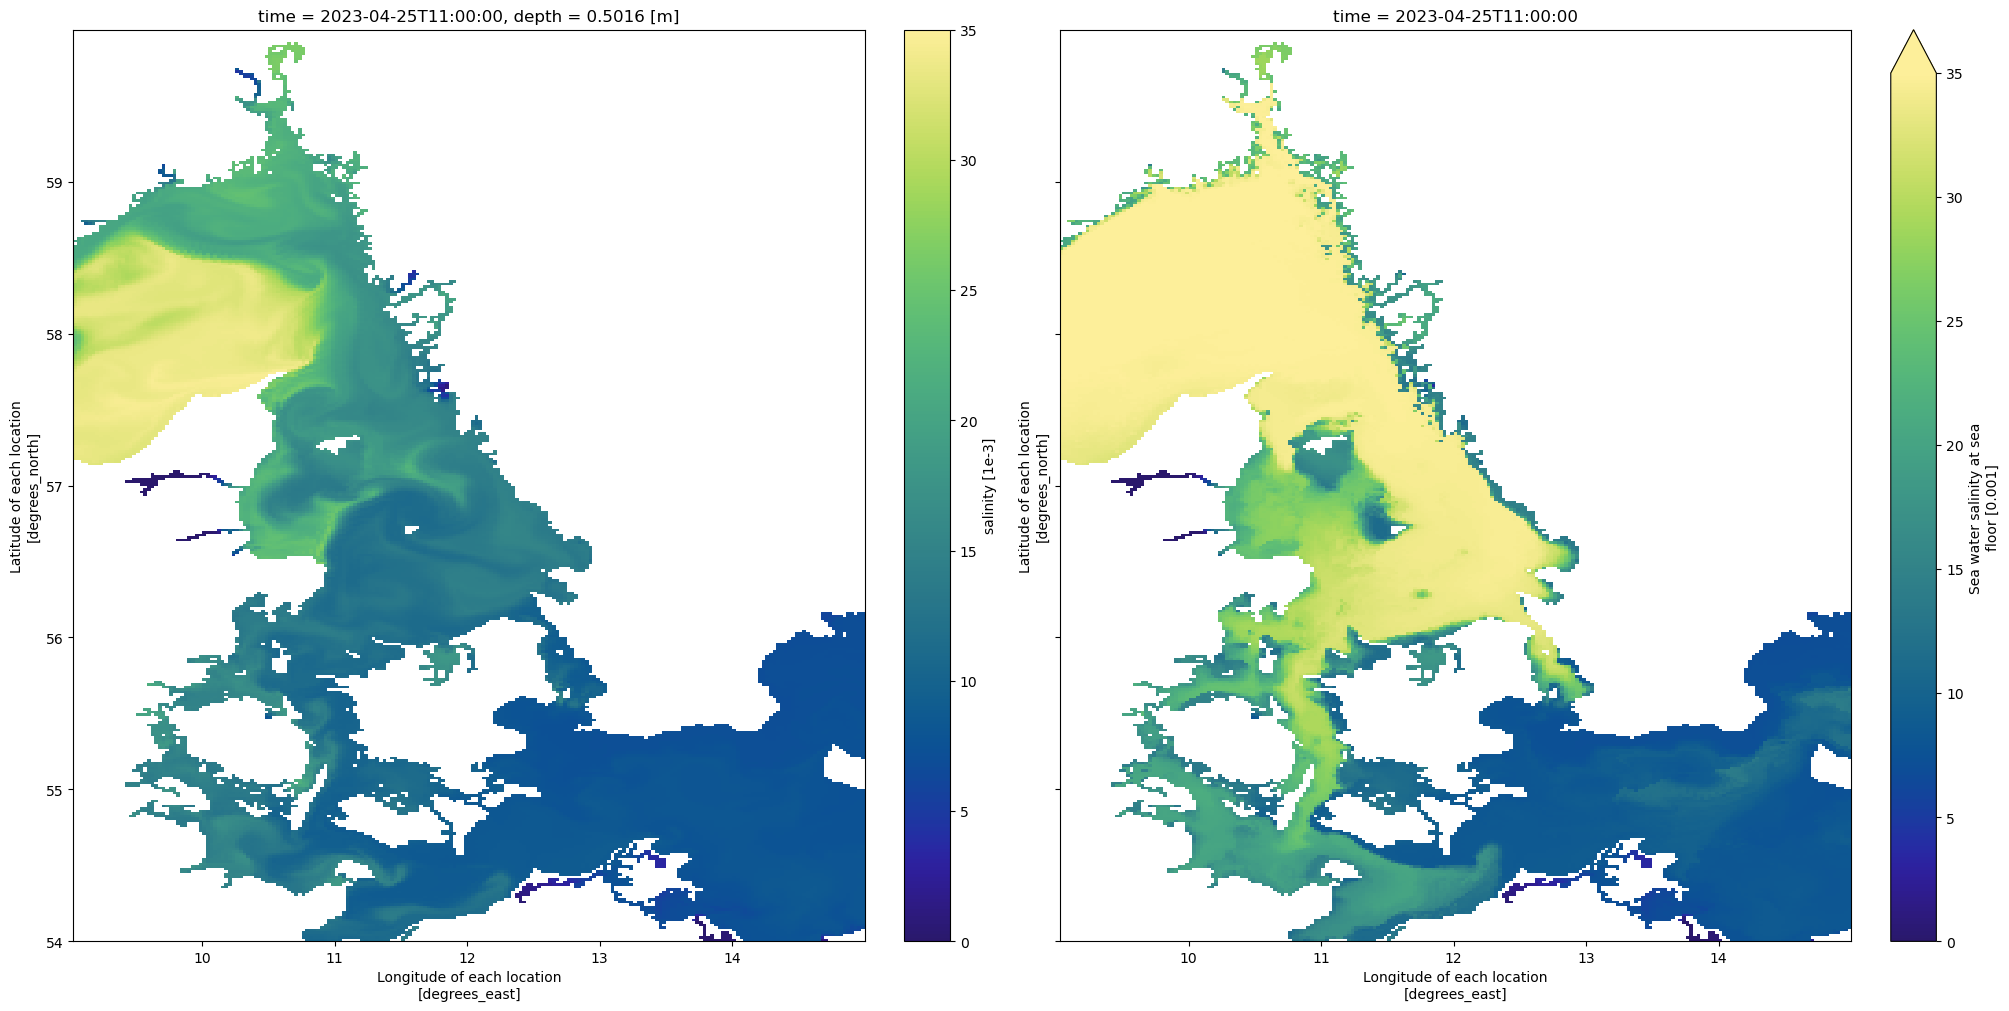

In [7]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(20,10),sharey=True,constrained_layout=True)

ds.isel(time=10,depth=0)['so'].plot(ax=ax,vmin=0,vmax=35,cmap=cmo.haline)
ds.isel(time=10)['sob'].plot(ax=bx,vmin=0,vmax=35,cmap=cmo.haline)

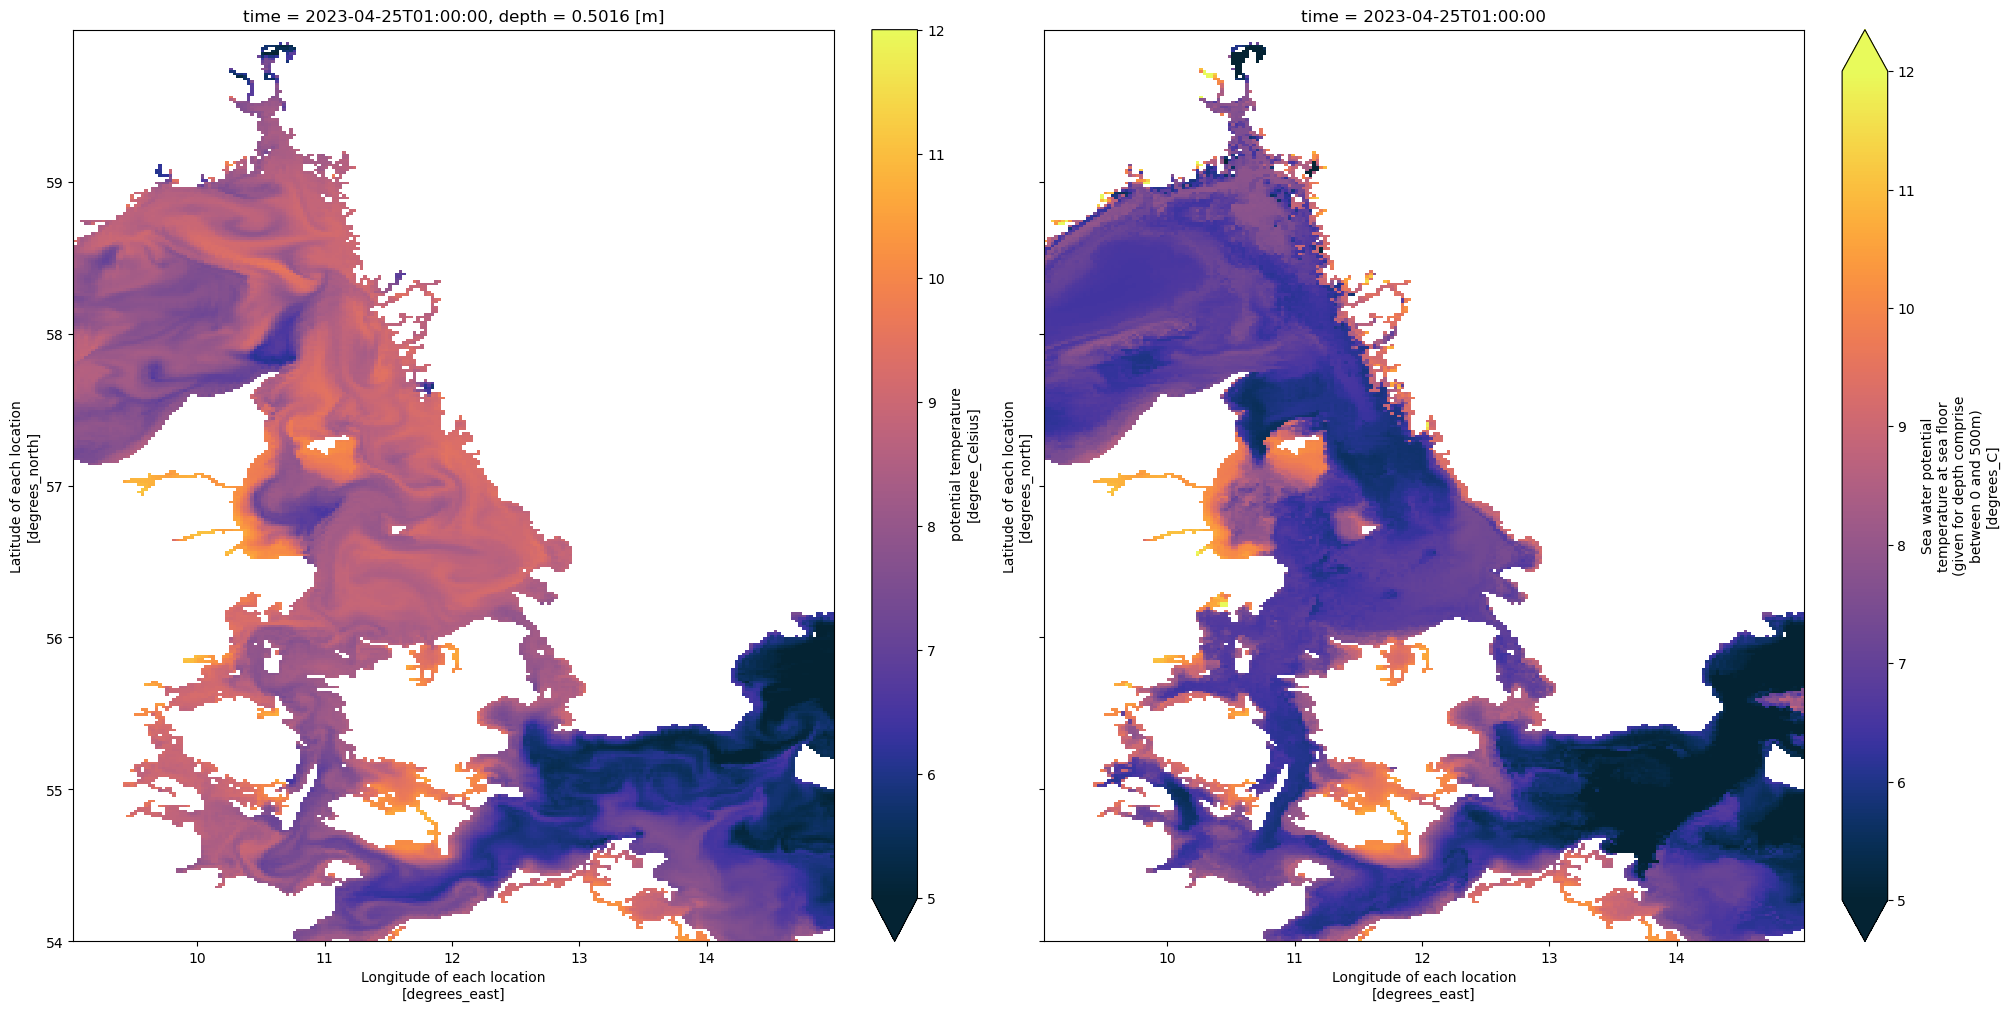

In [8]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(20,10),sharey=True,constrained_layout=True)

ds.isel(time=0,depth=0)['thetao'].plot(ax=ax,cmap=cmo.thermal,vmin=5,vmax=12)
ds.isel(time=0)['bottomT'].plot(ax=bx,cmap=cmo.thermal,vmin=5,vmax=12)

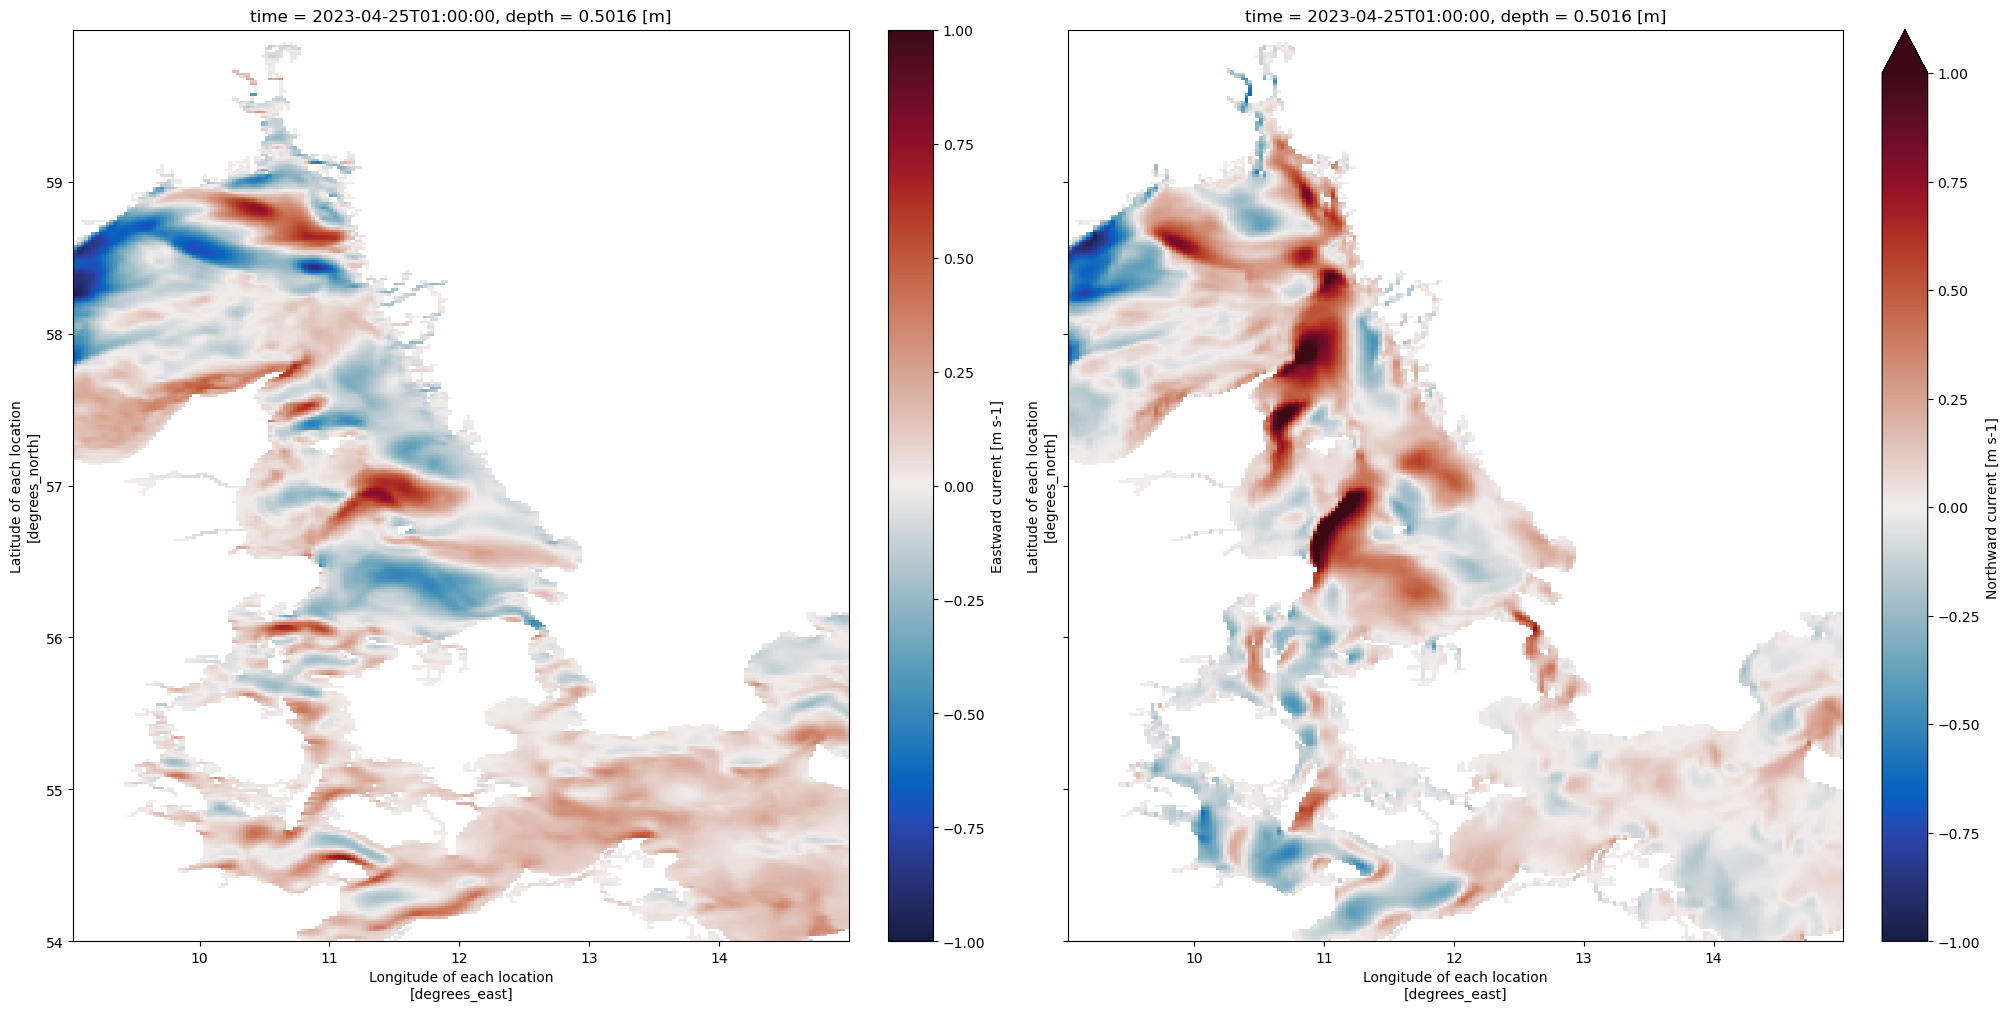

In [9]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(20,10),sharey=True,constrained_layout=True)

ds.isel(time=0,depth=0)['uo'].plot(ax=ax,cmap=cmo.balance,vmin=-1,vmax=1)
ds.isel(time=0,depth=0)['vo'].plot(ax=bx,cmap=cmo.balance,vmin=-1,vmax=1)

## Let'do the daily instead

In [58]:
ds = xr.open_mfdataset('/Users/xedhjo/Documents/Projects/OC4920/data/Baltic Sea/2023/04/*.nc')
ds = ds.sel(lon=slice(7,15),lat=slice(54,60))

In [59]:
list(ds.keys())

['thetao',
 'so',
 'uo',
 'vo',
 'wo',
 'bottomT',
 'sob',
 'sla',
 'sithick',
 'siconc',
 'mlotst']

In [60]:
for key in list(ds.keys()):
    print(ds[key].attrs['long_name'])

potential temperature
salinity
Eastward current
Northward current
Upward current
Sea water potential temperature at sea floor (given for depth comprise between 0 and 500m)
Sea water salinity at sea floor
Sea level elevation
Sea ice thickness
Sea ice cover
Ocean mixed layer thickness defined by density (as in de Boyer Montegut, 2004)


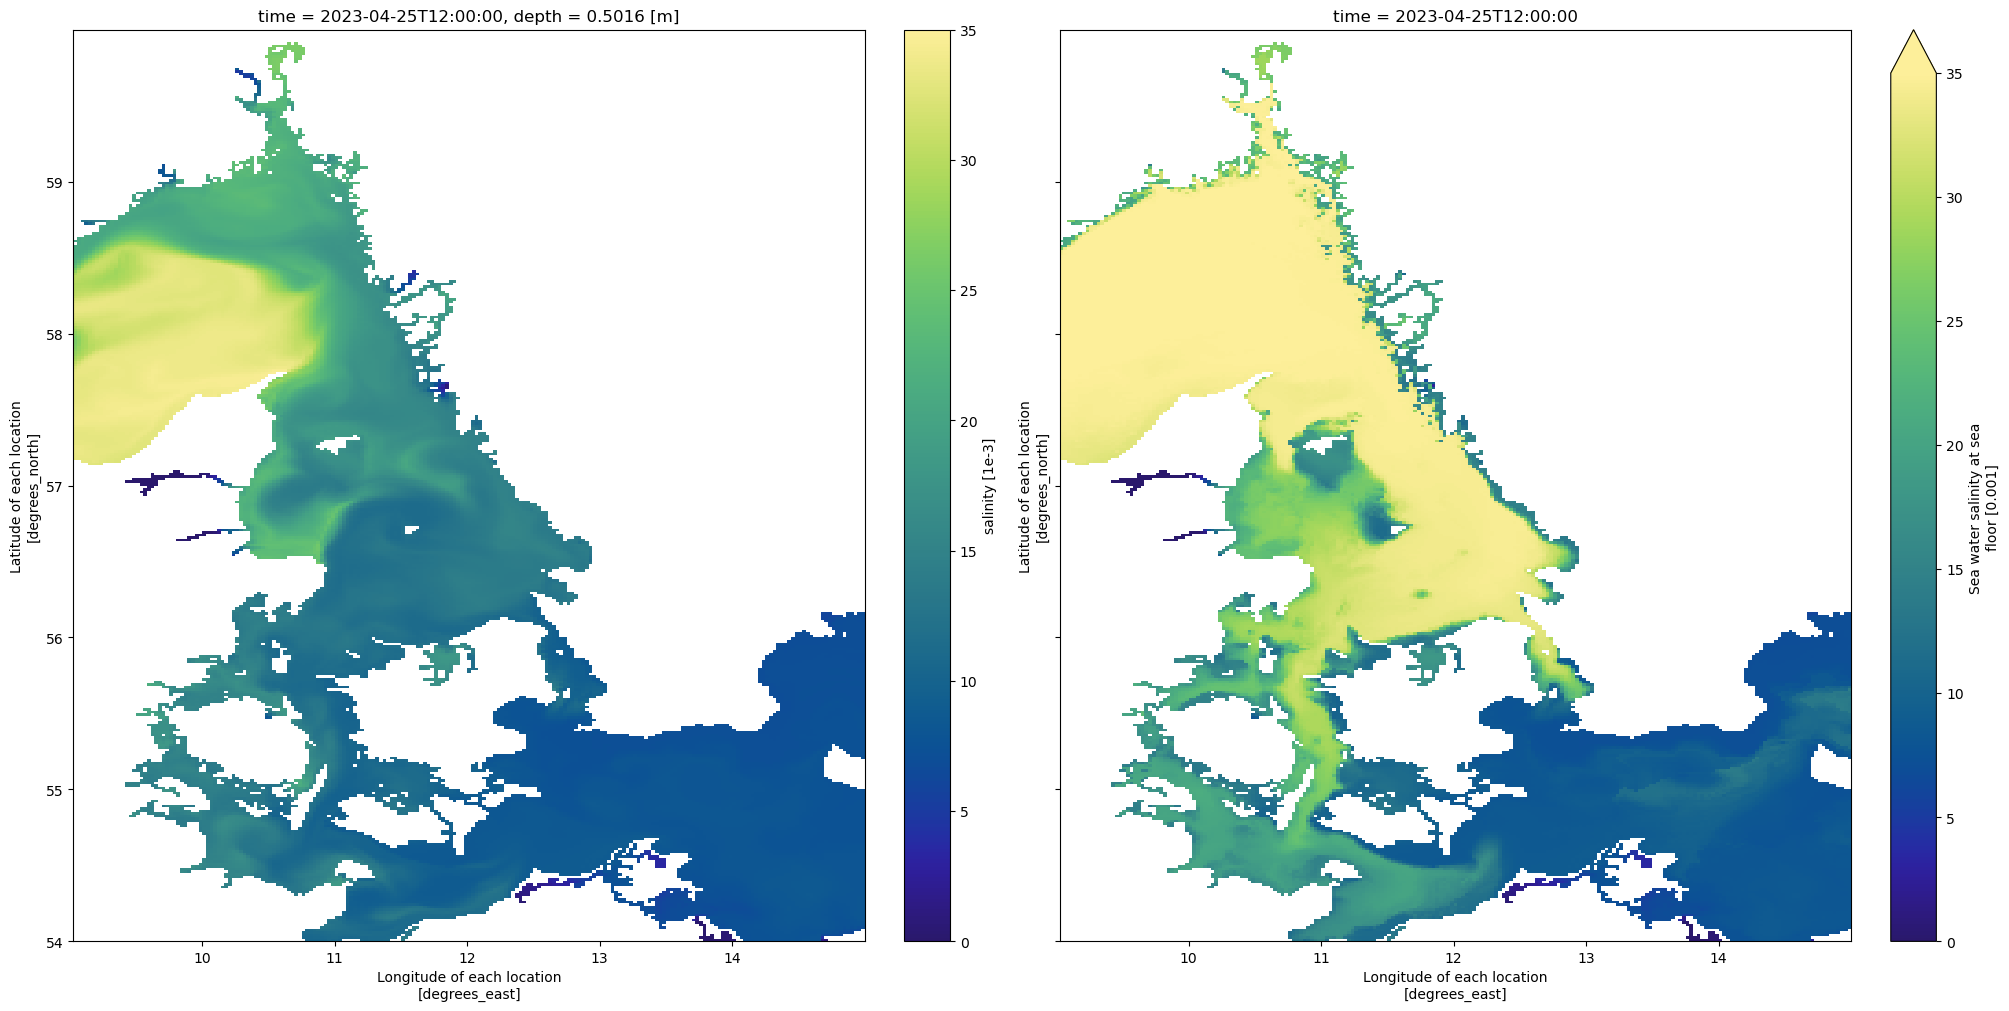

In [62]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(20,10),sharey=True,constrained_layout=True)

ds.isel(time=24,depth=0)['so'].plot(ax=ax,vmin=0,vmax=35,cmap=cmo.haline)
ds.isel(time=24)['sob'].plot(ax=bx,vmin=0,vmax=35,cmap=cmo.haline)

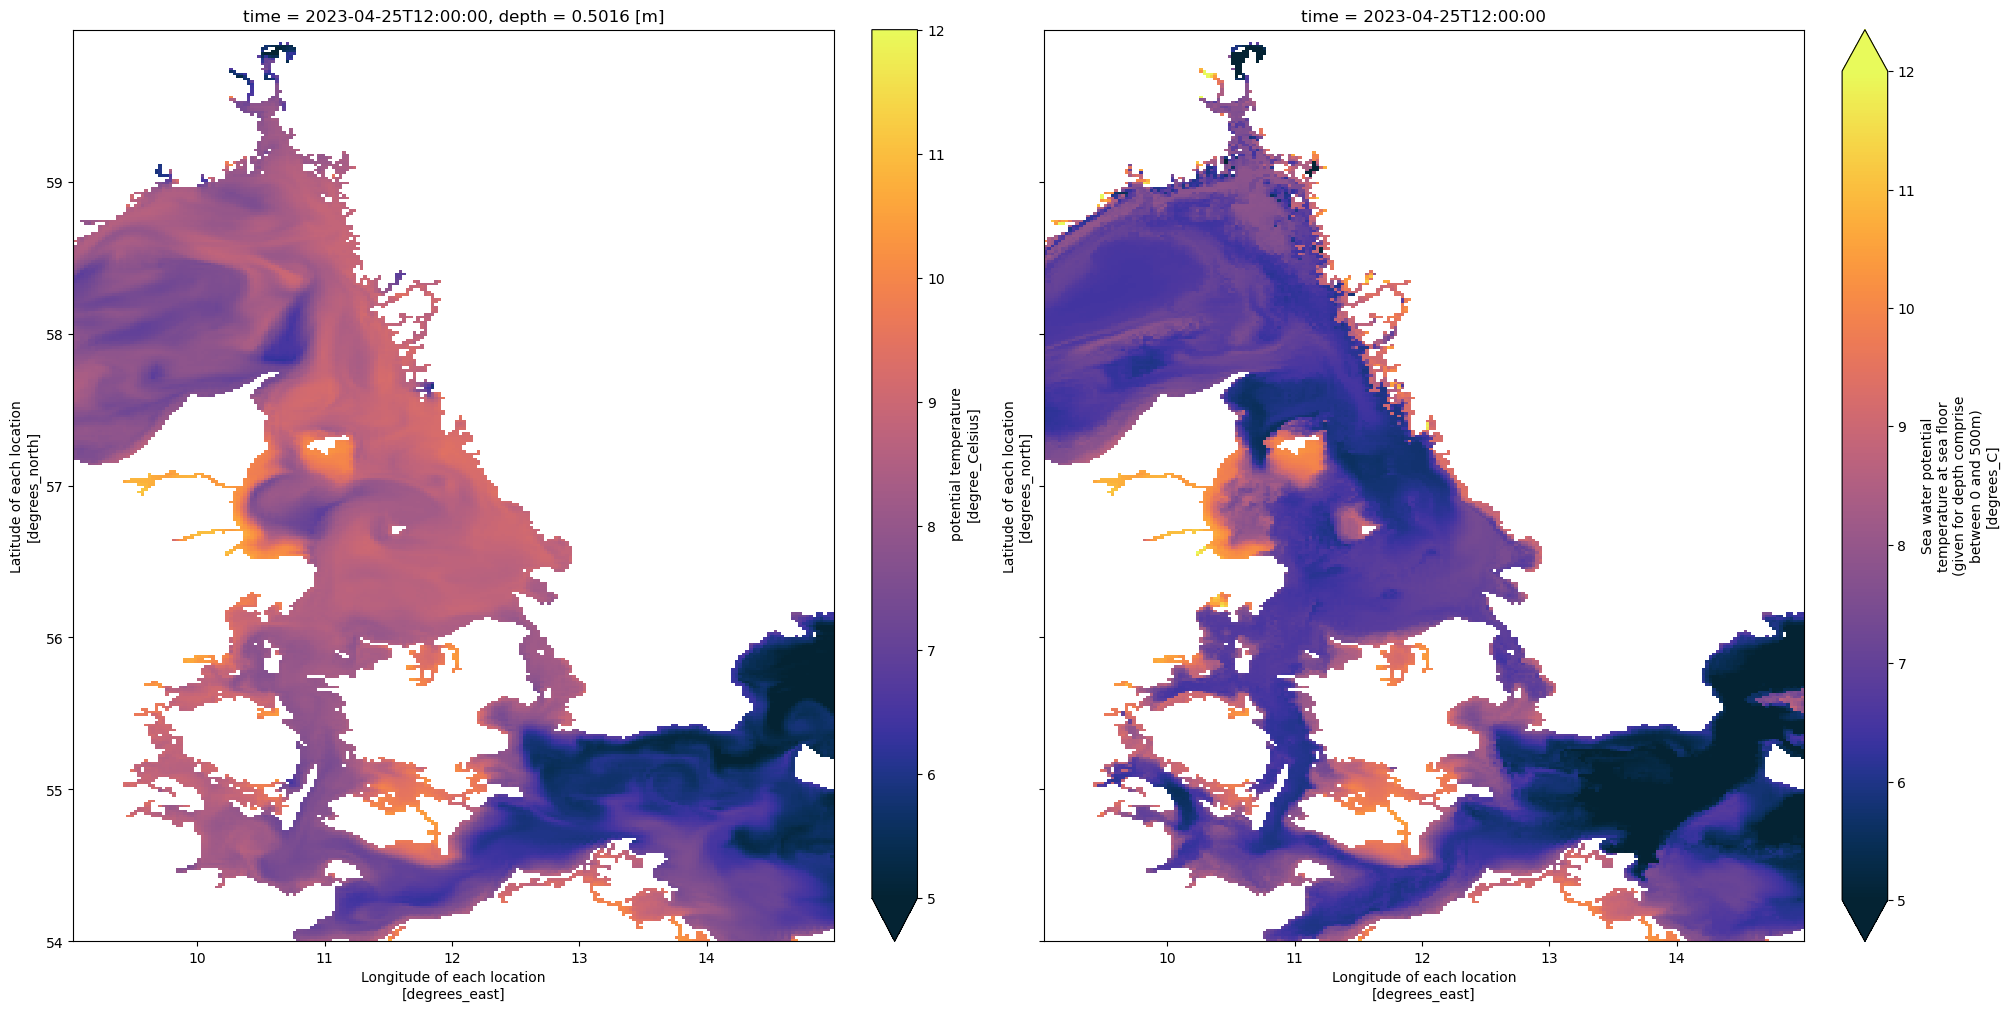

In [63]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(20,10),sharey=True,constrained_layout=True)

ds.isel(time=24,depth=0)['thetao'].plot(ax=ax,cmap=cmo.thermal,vmin=5,vmax=12)
ds.isel(time=24)['bottomT'].plot(ax=bx,cmap=cmo.thermal,vmin=5,vmax=12)

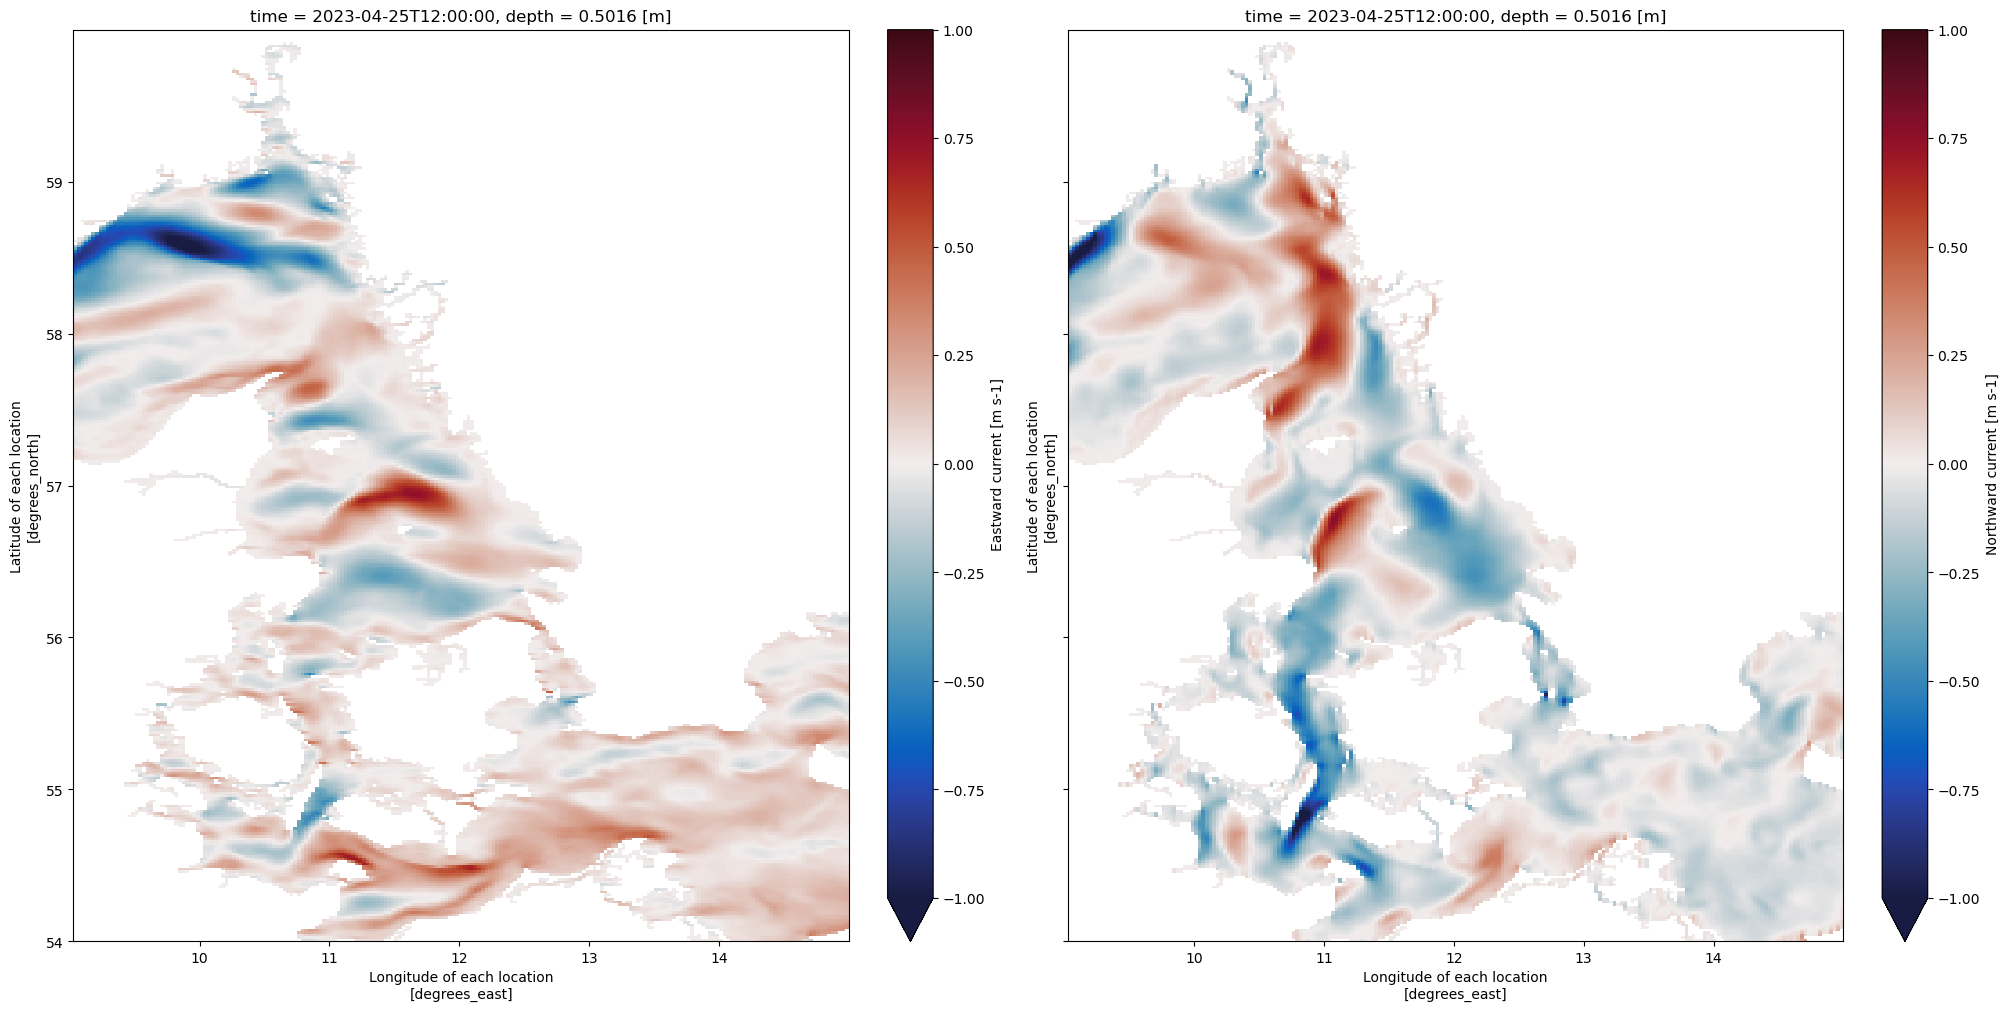

In [64]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(20,10),sharey=True,constrained_layout=True)

ds.isel(time=24,depth=0)['uo'].plot(ax=ax,cmap=cmo.balance,vmin=-1,vmax=1)
ds.isel(time=24,depth=0)['vo'].plot(ax=bx,cmap=cmo.balance,vmin=-1,vmax=1)

### Can you think of a better way to show the currents and salinity at the same time?

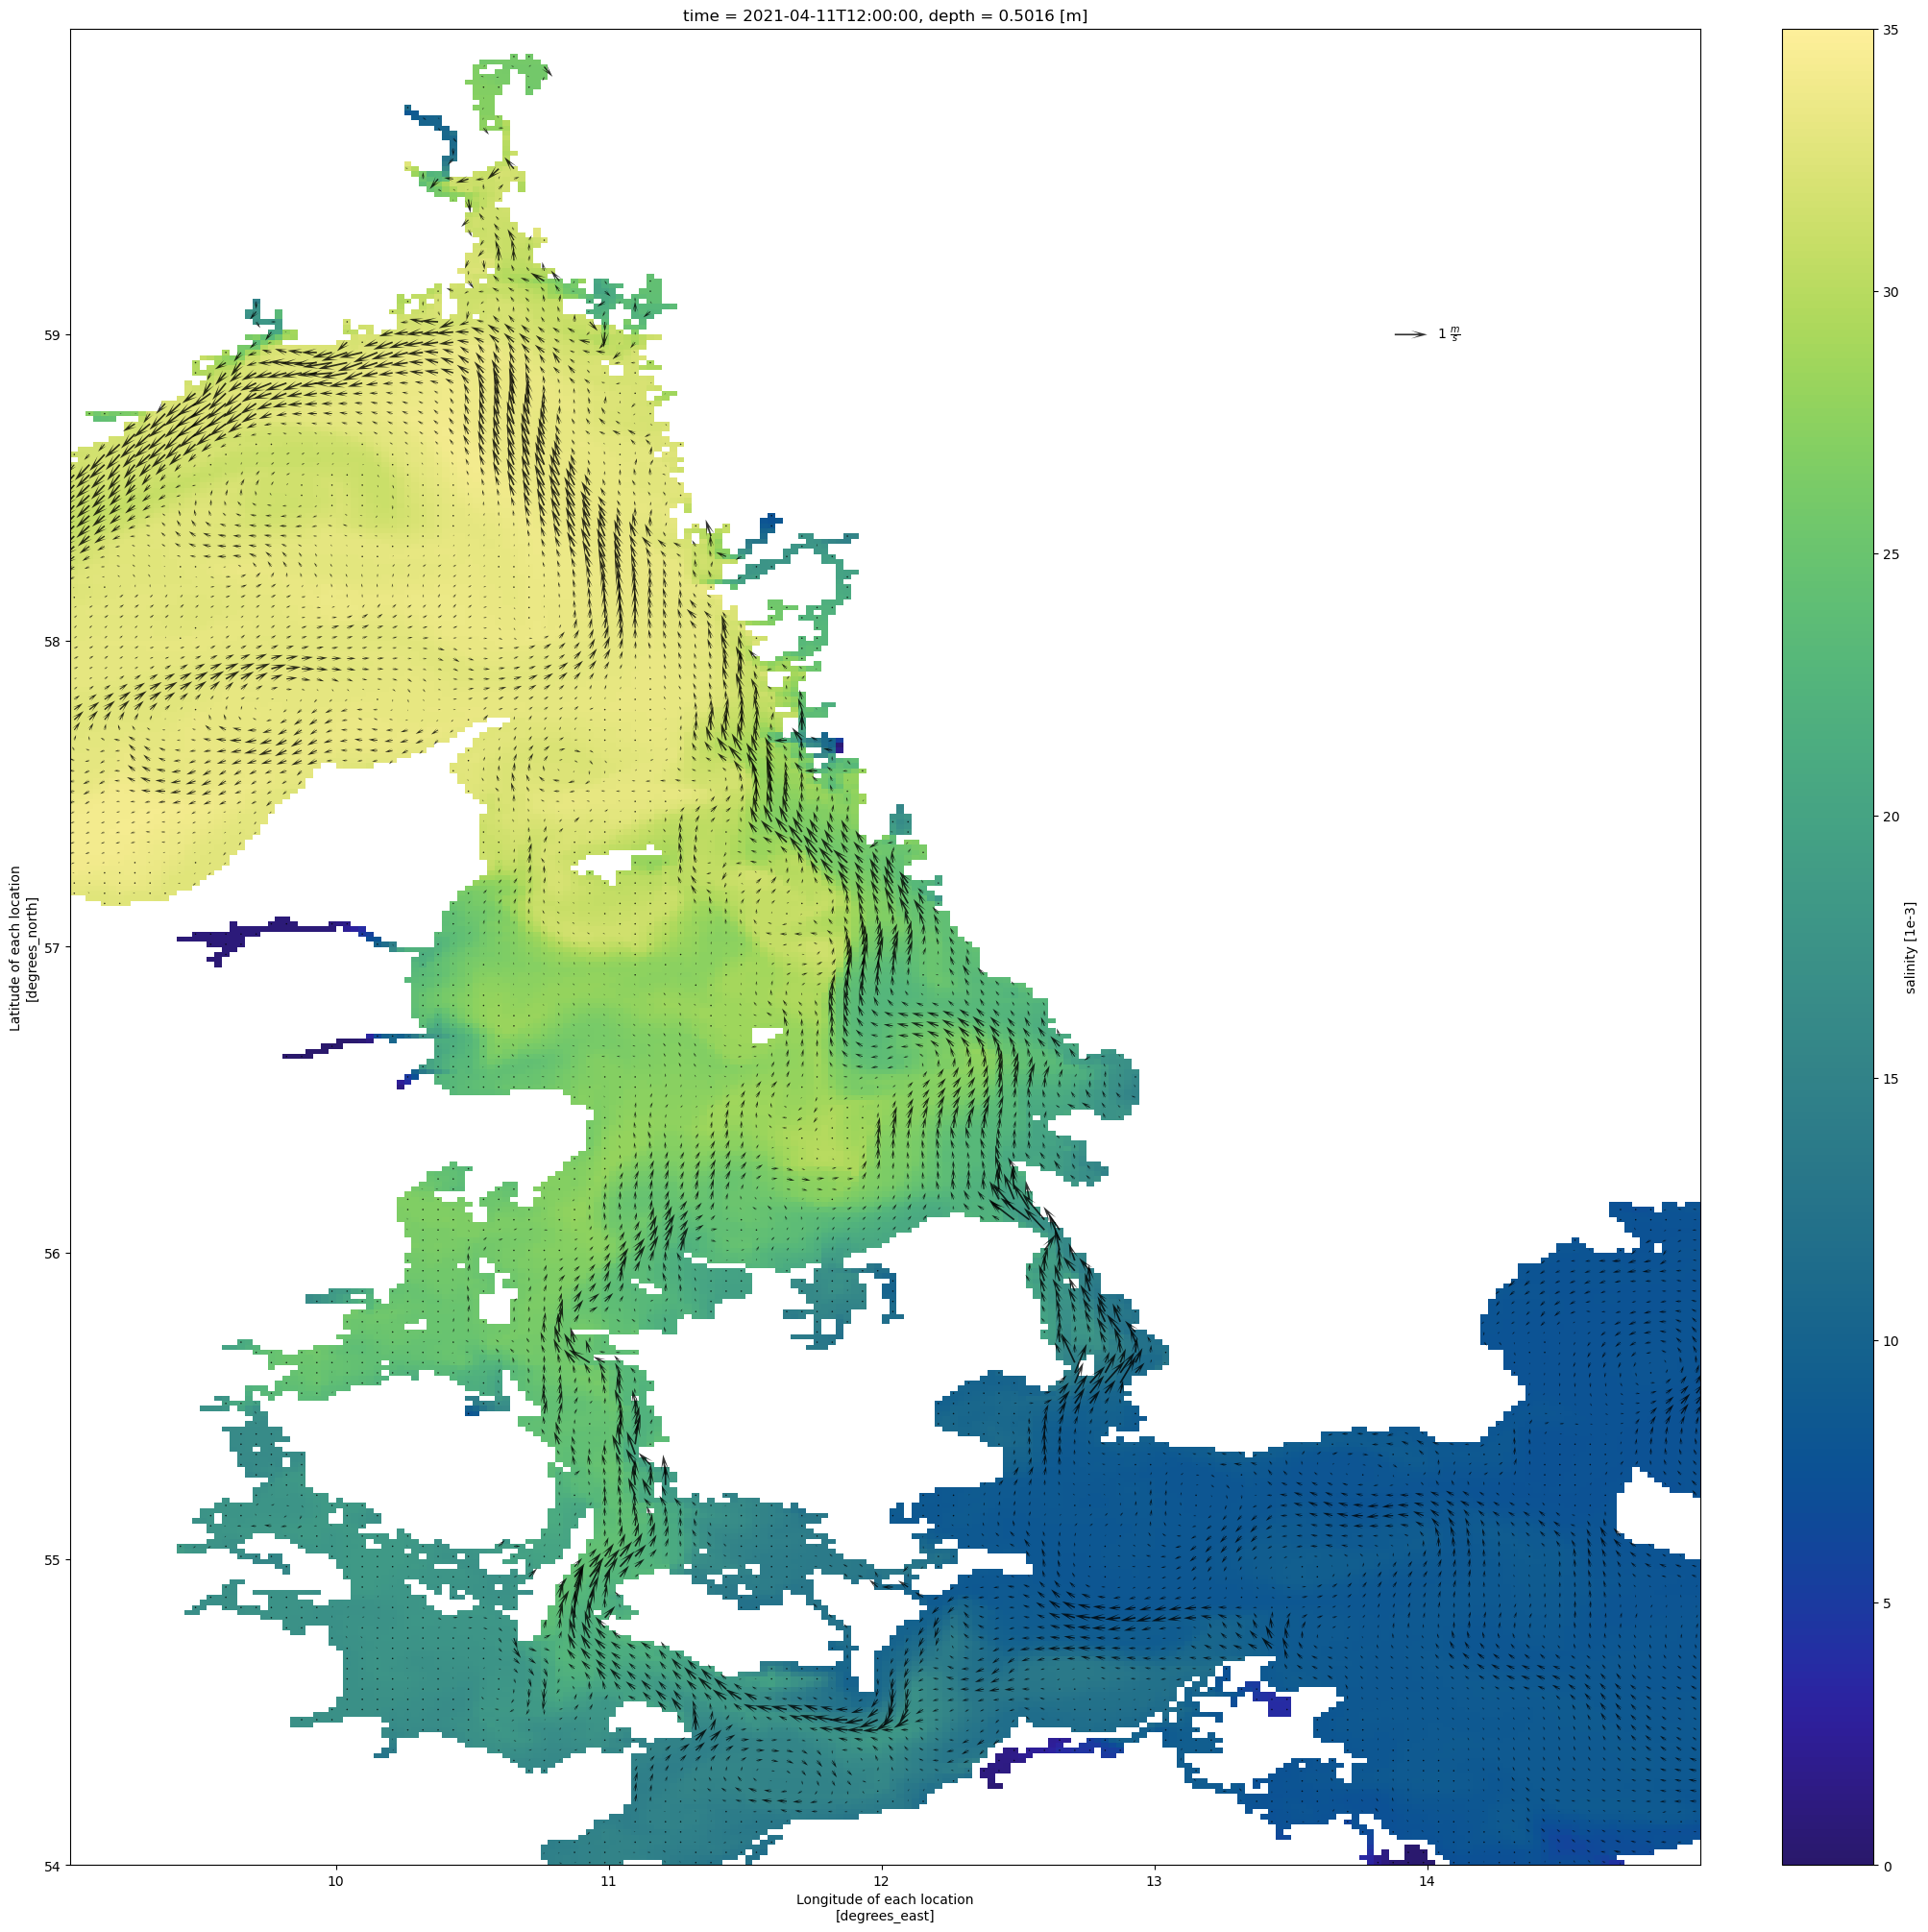

In [44]:
fig, ax = plt.subplots(1,1,figsize=(20,20),constrained_layout=True)

n = 2
ds.isel(time=10,depth=0)['so'].plot(ax=ax,vmin=0,vmax=35,cmap=cmo.haline)

q = ax.quiver(ds['lon'][::n],
              ds['lat'][::n],
              ds.isel(time=10,depth=0)['uo'][::n,::n],
              ds.isel(time=10,depth=0)['vo'][::n,::n],
              color='k',scale=50, alpha=0.8, headaxislength=5, headlength=10, headwidth=5, width=1e-3)

qk = ax.quiverkey(q, 14, 59, 1, r'1 $\frac{m}{s}$', labelpos='E',coordinates='data',zorder=100)